In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from style_transfer import run_style_transfer, Config

In [3]:
content_path = "data/dog.jpeg"
style_path = "data/time.jpeg"

Content:

![content](data/dog.jpeg)

Style:

![style](data/time.jpeg)

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def show(img: np.ndarray):
    plt.imshow(img)
    plt.axis('off')
    plt.show()

## Default config

In [5]:
print(Config())


Config:
content_weight: 1
style_weight: 10000.0
lr: 0.003
iterations: 2000
device: cuda
content_layers: {'19': 1.0, '21': 1.0, '28': 1.0}
style_layers: {'0': 1.0, '5': 1.0, '10': 1.0}
image_size: 224
log_interval: 250
verbose: True
        


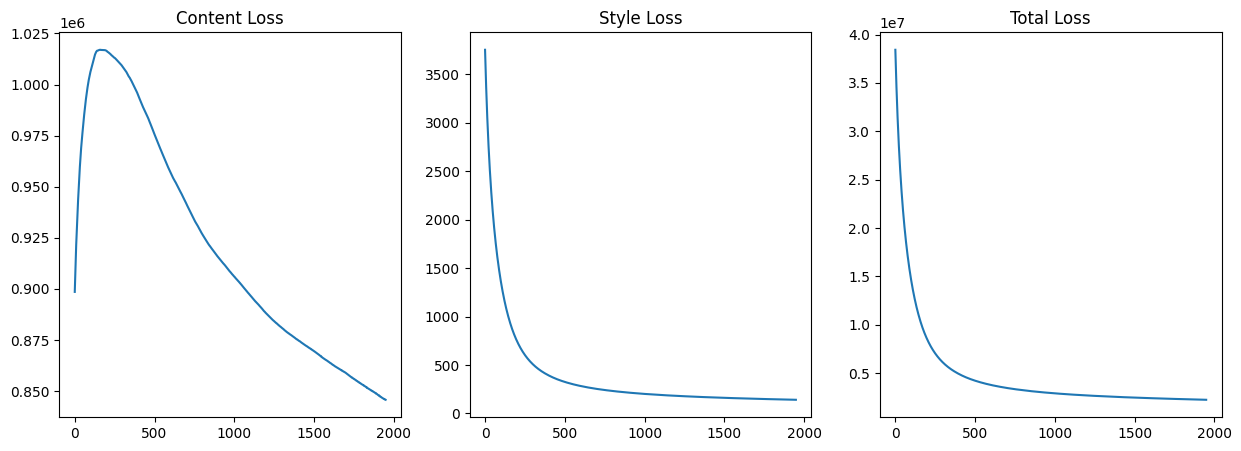

In [6]:
res, content_losses, style_losses, total_losses = run_style_transfer(content_path, style_path, Config(verbose=False))

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

from_it = 50
axs[0].plot(content_losses[from_it:], label='content')
axs[0].set_title('Content Loss')
axs[1].plot(style_losses[from_it:], label='style')
axs[1].set_title('Style Loss')
axs[2].plot(total_losses[from_it:], label='total')
axs[2].set_title('Total Loss')

plt.show()

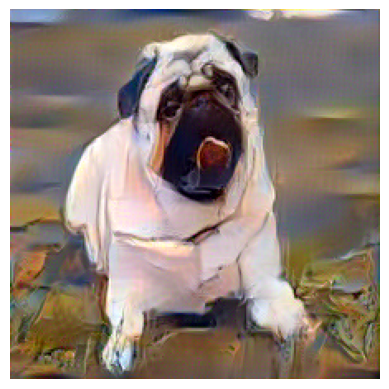

In [7]:
show(res)

## Iterating over different hyperparameters

In [8]:
hyperparams = {
    'style_weight': [1e3, 1e4, 1e5],
    'content_weight': [0.1, 1, 5],
    'image_size': [128, 256, 512],
    'lr': [0.001, 0.003, 0.01],
    'iterations': [1000, 2000, 5000],
    'style_layers': [
        {'0': 1.0},
        {'5': 1.0},
        {'10': 1.0},
        {'0': 0.9, '5': 0.7},
        {'5': 0.8, '10': 0.6},
        {'0': 1.0, '5': 0.8, '10': 0.5},

        {'0': 1.0, '5': 0.8, '19': 0.33, '21': 0.66, '28': 1.0}
    ],
    'content_layers': [
        {'19': 1.0},
        {'21': 1.0},
        {'28': 1.0},
        {'19': 0.8, '21': 1.0},
        {'21': 0.9, '28': 0.5},
        {'19': 0.33, '21': 0.66, '28': 1.0},

        {'0': 1.0, '5': 0.8, '19': 0.33, '21': 0.66, '28': 1.0}
    ]
}

In [9]:
number_of_configs = 10

configs = []

# each config is build using random sampling of each hyperparameter value

for _ in range(number_of_configs):
    config = Config(verbose=False)
    for key, values in hyperparams.items():
        setattr(config, key, np.random.choice(values))
    configs.append(config)

Config 1:

Config:
content_weight: 5.0
style_weight: 1000.0
lr: 0.001
iterations: 2000
device: cuda
content_layers: {'19': 1.0}
style_layers: {'5': 0.8, '10': 0.6}
image_size: 256
log_interval: 250
verbose: False
        



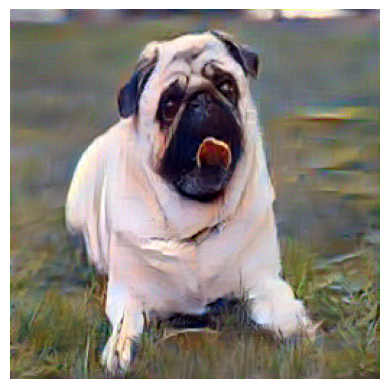

--------------------------------------------------
Config 2:

Config:
content_weight: 0.1
style_weight: 10000.0
lr: 0.003
iterations: 2000
device: cuda
content_layers: {'0': 1.0, '5': 0.8, '19': 0.33, '21': 0.66, '28': 1.0}
style_layers: {'5': 0.8, '10': 0.6}
image_size: 128
log_interval: 250
verbose: False
        



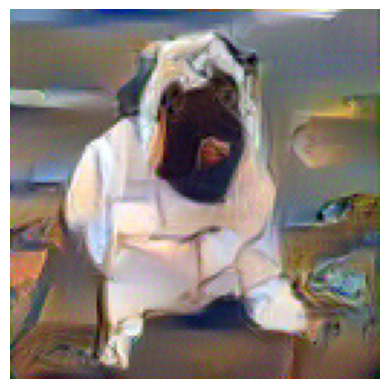

--------------------------------------------------
Config 3:

Config:
content_weight: 5.0
style_weight: 100000.0
lr: 0.001
iterations: 2000
device: cuda
content_layers: {'19': 0.33, '21': 0.66, '28': 1.0}
style_layers: {'0': 0.9, '5': 0.7}
image_size: 128
log_interval: 250
verbose: False
        



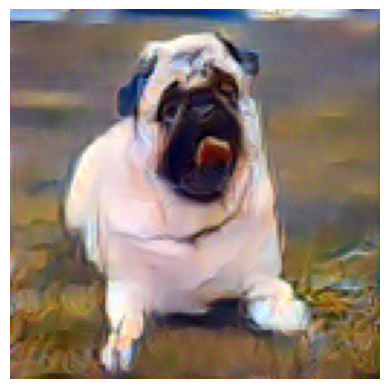

--------------------------------------------------
Config 4:

Config:
content_weight: 0.1
style_weight: 1000.0
lr: 0.003
iterations: 2000
device: cuda
content_layers: {'28': 1.0}
style_layers: {'10': 1.0}
image_size: 256
log_interval: 250
verbose: False
        



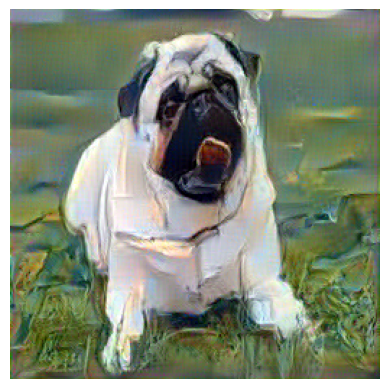

--------------------------------------------------
Config 5:

Config:
content_weight: 5.0
style_weight: 10000.0
lr: 0.01
iterations: 1000
device: cuda
content_layers: {'19': 1.0}
style_layers: {'0': 0.9, '5': 0.7}
image_size: 128
log_interval: 250
verbose: False
        



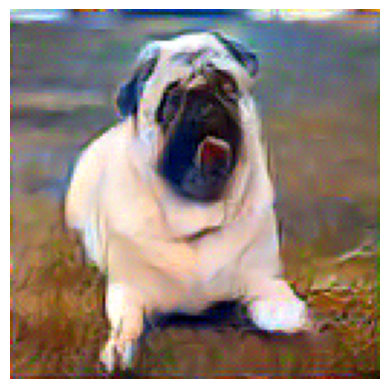

--------------------------------------------------
Config 6:

Config:
content_weight: 5.0
style_weight: 10000.0
lr: 0.001
iterations: 5000
device: cuda
content_layers: {'28': 1.0}
style_layers: {'5': 0.8, '10': 0.6}
image_size: 128
log_interval: 250
verbose: False
        



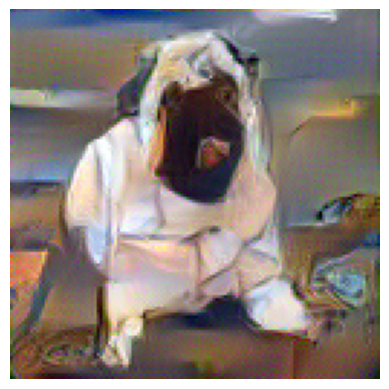

--------------------------------------------------
Config 7:

Config:
content_weight: 0.1
style_weight: 10000.0
lr: 0.01
iterations: 5000
device: cuda
content_layers: {'21': 0.9, '28': 0.5}
style_layers: {'10': 1.0}
image_size: 256
log_interval: 250
verbose: False
        



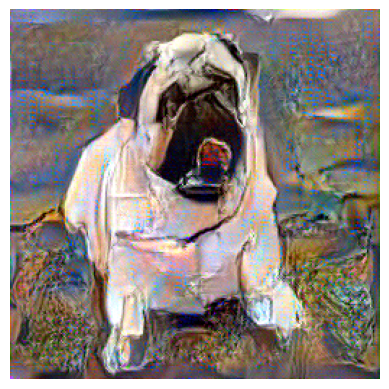

--------------------------------------------------
Config 8:

Config:
content_weight: 0.1
style_weight: 100000.0
lr: 0.001
iterations: 5000
device: cuda
content_layers: {'21': 0.9, '28': 0.5}
style_layers: {'0': 0.9, '5': 0.7}
image_size: 512
log_interval: 250
verbose: False
        



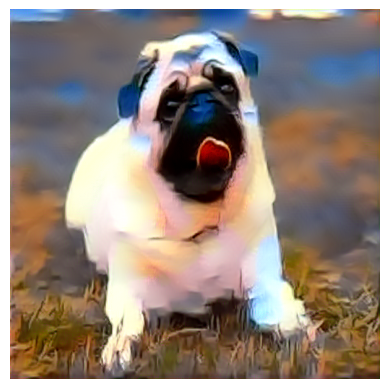

--------------------------------------------------
Config 9:

Config:
content_weight: 5.0
style_weight: 1000.0
lr: 0.01
iterations: 5000
device: cuda
content_layers: {'21': 0.9, '28': 0.5}
style_layers: {'5': 1.0}
image_size: 256
log_interval: 250
verbose: False
        



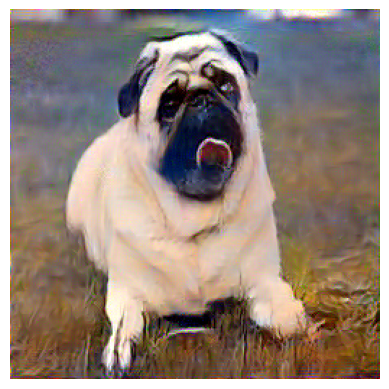

--------------------------------------------------
Config 10:

Config:
content_weight: 0.1
style_weight: 10000.0
lr: 0.003
iterations: 5000
device: cuda
content_layers: {'0': 1.0, '5': 0.8, '19': 0.33, '21': 0.66, '28': 1.0}
style_layers: {'0': 1.0, '5': 0.8, '19': 0.33, '21': 0.66, '28': 1.0}
image_size: 512
log_interval: 250
verbose: False
        



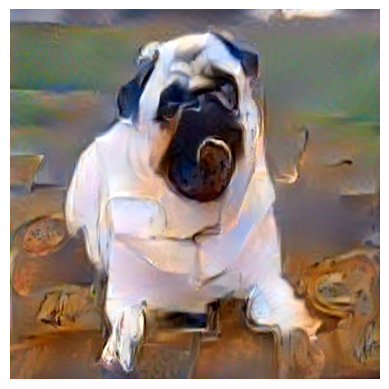

--------------------------------------------------


In [10]:
for i, config in enumerate(configs):
    print(f"Config {i+1}:")
    print(config)
    print()

    res, content_losses, style_losses, total_losses = run_style_transfer(content_path, style_path, config)

    show(res)

    print("-" * 50)

## Conclusion

I have tried different hyperparameters. It is hard to day which result is better because it depends on what we want to achieve. If we want to have a picture that is more similar to the content, we should use a higher weight for the content loss. If we want to have a picture that is more similar to the style, we should use a higher weight for the style loss. 
Also, I noticed that the approach works better if style loss is conted with respect to first layers of the network and content loss is counted with respect to last layers of the network. It happens because the first layers of the network are responsible for the low-level features and the last layers are responsible for the high-level features.